<a href="https://colab.research.google.com/github/Adam-Diaa/Medical-segmentation/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U TotalSegmentator nibabel matplotlib           #install totalsegmentator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB

In [1]:
from google.colab import drive              #mounting drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_dir = "/content/drive/MyDrive/task 1"

In [3]:
import os, glob


data_dir = "/content/drive/MyDrive/task 1"

In [11]:
# Find all .nii or .nii.gz files
nii_files = glob.glob(os.path.join(data_dir, "**/*.nii"), recursive=True)
nii_files += glob.glob(os.path.join(data_dir, "**/*.nii.gz"), recursive=True)

print(f"Found {len(nii_files)} scans:")
for f in nii_files[:10]:  # show first 10
    print(" ", f)

# instead of all scans, pick only first 2
nii_files = nii_files[:2]

print("Now processing only:", nii_files)

Found 1 scans:
  /content/drive/MyDrive/task 1/Copy of ct.nii.gz
Now processing only: ['/content/drive/MyDrive/task 1/Copy of ct.nii.gz']


In [12]:
import subprocess                                                      #segmentation
from pathlib import Path
import os

output_root = "/content/drive/MyDrive/task 1"
os.makedirs(output_root, exist_ok=True)

for i, scan in enumerate(nii_files, 1):
    case_name = Path(scan).stem
    out_dir = os.path.join(output_root, case_name)
    os.makedirs(out_dir, exist_ok=True)

    cmd = [
        "TotalSegmentator",
        "-i", scan,
        "-o", out_dir,
        "--fast"
    ]
    print(f"[{i}/{len(nii_files)}] Running:", " ".join(cmd))
    subprocess.run(cmd, check=True)

print("Segmentation finished. Results are in:", output_root)

[1/1] Running: TotalSegmentator -i /content/drive/MyDrive/task 1/Copy of ct.nii.gz -o /content/drive/MyDrive/task 1/Copy of ct.nii --fast
Segmentation finished. Results are in: /content/drive/MyDrive/task 1


In [13]:
import glob                                                                 #step 4
import os

case_folders = sorted([f for f in os.listdir(output_root) if os.path.isdir(os.path.join(output_root, f))])
print("Cases segmented:", case_folders)

first_case = case_folders[0]
files = glob.glob(os.path.join(output_root, first_case, "**/*.nii*"), recursive=True)
print(f"\nFiles for {first_case}:")
for f in files:
    print(" ", f)

Cases segmented: ['.ipynb_checkpoints', 'segmentation.nii']

Files for .ipynb_checkpoints:


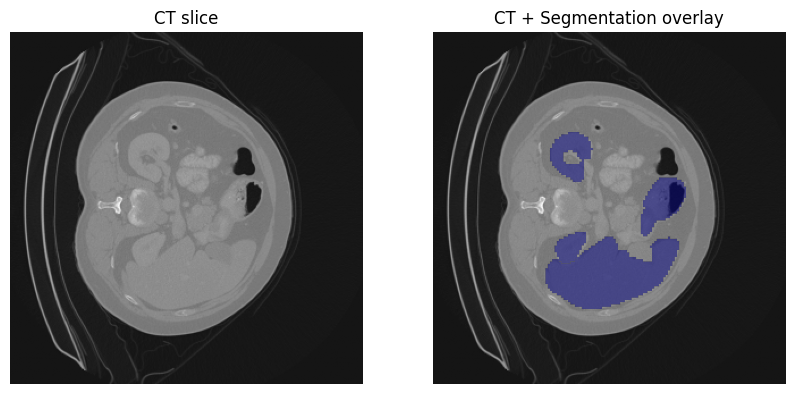

In [15]:
import nibabel as nib                               #2D
import numpy as np
import matplotlib.pyplot as plt

# Pick first case
ct_path = '/content/drive/MyDrive/task 1/Copy of ct.nii.gz'
seg_path = '/content/drive/MyDrive/task 1/segmentation/liver.nii.gz'
seg_path2 = '/content/drive/MyDrive/task 1/segmentation/kidney_left.nii.gz'
seg_path3 = '/content/drive/MyDrive/task 1/segmentation/kidney_right.nii.gz'
seg_path4 = '/content/drive/MyDrive/task 1/segmentation/stomach.nii.gz'

ct = nib.load(ct_path).get_fdata()
seg = nib.load(seg_path).get_fdata()
seg2 =nib.load(seg_path2).get_fdata()
seg3 = nib.load(seg_path3).get_fdata()
seg4 = nib.load(seg_path4).get_fdata()
# Show middle slice
z = ct.shape[2] // 2
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(ct[:,:,z], cmap="gray")
plt.title("CT slice")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(ct[:,:,z], cmap="gray")
plt.imshow(np.ma.masked_where(seg[:,:,z]==0, seg[:,:,z]), cmap="jet", alpha=0.5)
plt.imshow(np.ma.masked_where(seg2[:,:,z]==0, seg2[:,:,z]), cmap="jet", alpha=0.5)
plt.imshow(np.ma.masked_where(seg3[:,:,z]==0, seg3[:,:,z]), cmap="jet", alpha=0.5)
plt.imshow(np.ma.masked_where(seg4[:,:,z]==0, seg4[:,:,z]), cmap="jet", alpha=0.5)
plt.title("CT + Segmentation overlay")
plt.axis("off")
plt.show()



In [16]:
import os                                 #3D liver
import nibabel as nib
import numpy as np
import plotly.graph_objects as go

# --- Load segmentation
seg_dir = "/content/drive/MyDrive/task 1/segmentation"
liver_path = os.path.join(seg_dir, "liver.nii.gz")

liver_img = nib.load(liver_path)
liver_data = liver_img.get_fdata()

# Downsample for speed
liver_small = liver_data[::2, ::2, ::2] > 0
x, y, z = np.where(liver_small)

# Create 3D scatter for liver
scatter = go.Scatter3d(
    x=x, y=y, z=z,
    mode="markers",
    marker=dict(size=2, color="darkred", opacity=0.1),
    name="Liver"
)

fig = go.Figure(data=[scatter])

# Slider for opacity
steps = []
for op in np.linspace(0.1, 1.0, 10):
    step = dict(
        method="restyle",
        args=[{"marker.opacity": [op]}],
        label=f"{op:.1f}"
    )
    steps.append(step)

sliders = [dict(
    active=4,
    currentvalue={"prefix": "Opacity: "},
    pad={"t": 50},
    steps=steps
)]

# Buttons (switch) for Transparent / Opaque
buttons = [
    dict(label="Transparent", method="restyle",
         args=[{"marker.opacity": [0.1]}]),
    dict(label="Opaque", method="restyle",
         args=[{"marker.opacity": [1.0]}]),
]

# Dropdown for colors
color_dropdown = [
    dict(label="Dark Red", method="restyle", args=[{"marker.color": ["darkred"]}]),
    dict(label="Blue", method="restyle", args=[{"marker.color": ["blue"]}]),
    dict(label="Green", method="restyle", args=[{"marker.color": ["green"]}]),
    dict(label="Purple", method="restyle", args=[{"marker.color": ["purple"]}]),
    dict(label="Orange", method="restyle", args=[{"marker.color": ["orange"]}]),
    dict(label="Yellow", method="restyle", args=[{"marker.color": ["yellow"]}]),
    dict(label="Cyan", method="restyle", args=[{"marker.color": ["cyan"]}]),
    dict(label="Pink", method="restyle", args=[{"marker.color": ["pink"]}]),
    dict(label="Gray", method="restyle", args=[{"marker.color": ["gray"]}]),

]

# Layout
fig.update_layout(
    sliders=sliders,
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=buttons,
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1, y=1.15, xanchor="left", yanchor="top"
        ),
        dict(
            type="dropdown",
            direction="down",
            buttons=color_dropdown,
            x=0.4, y=1.15, xanchor="left", yanchor="top"
        )
    ],
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False)
    ),
    title="3D Liver Segmentation with Opacity & Color Controls"
)

fig.show()



In [17]:
import os                              #3D kidneys
import nibabel as nib
import numpy as np
import plotly.graph_objects as go

# Function to load mask and downsample
def load_mask(seg_dir, organ_file):
    organ_path = os.path.join(seg_dir, organ_file)
    if not os.path.exists(organ_path):
        raise FileNotFoundError(f"ملف {organ_file} مش موجود في {seg_dir}")
    organ_img = nib.load(organ_path)
    organ_data = organ_img.get_fdata()
    organ_small = organ_data[::2, ::2, ::2] > 0
    return np.where(organ_small)

# Kidneys Visualization
def show_kidneys(seg_dir):
    kidney_files = {
        "Left Kidney": "kidney_left.nii.gz",
        "Right Kidney": "kidney_right.nii.gz"
    }

    default_colors = ["red", "blue"]
    fig = go.Figure()

    # Add each kidney
    for i, (name, file) in enumerate(kidney_files.items()):
        x, y, z = load_mask(seg_dir, file)
        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode="markers",
            name=name,
            marker=dict(size=2, color=default_colors[i], opacity=0.1)
        ))

    # Global Opacity Switch
    buttons = [
        dict(label="Transparent", method="restyle",
             args=[{"marker.opacity": [0.1]*len(kidney_files)}, list(range(len(kidney_files)))]),
        dict(label="Opaque", method="restyle",
             args=[{"marker.opacity": [1.0]*len(kidney_files)}, list(range(len(kidney_files)))]),
    ]

    # Opacity Slider
    steps = []
    for op in np.linspace(0.1, 1.0, 10):
        step = dict(
            method="restyle",
            args=[{"marker.opacity": [op]*len(kidney_files)}, list(range(len(kidney_files)))],
            label=f"{op:.1f}"
        )
        steps.append(step)

    sliders = [dict(
        active=5,
        currentvalue={"prefix": "Opacity: "},
        pad={"t": 50},
        steps=steps
    )]

    # Dropdowns for Colors
    updatemenus = [
        dict(
            type="buttons",
            direction="left",
            buttons=buttons,
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.0, y=1.2, xanchor="left", yanchor="top"
        )
    ]

    color_options = ["red", "blue", "green", "purple", "orange", "yellow", "cyan", "pink", "gray"]

    for i, (name, file) in enumerate(kidney_files.items()):
        color_dropdown = [
            dict(label=c + (" ✅" if c == default_colors[i] else ""),
                 method="restyle",
                 args=[{"marker.color": [c]}, [i]])
            for c in color_options
        ]
        updatemenus.append(dict(
            type="dropdown",
            direction="down",
            buttons=color_dropdown,
            x=0.25 + i*0.25, y=1,
            xanchor="left", yanchor="top",
            showactive=True,
            bgcolor="white",
            font=dict(size=12),
        ))

    # Layout
    fig.update_layout(
        updatemenus=updatemenus,
        sliders=sliders,
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        ),
        title="3D Segmentation: Kidneys"
    )

    fig.show()


# Run
seg_dir = "/content/drive/MyDrive/task 1/segmentation"
show_kidneys(seg_dir)






In [18]:
import os                          #3D lungs
import nibabel as nib
import numpy as np
import plotly.graph_objects as go

# Function to load mask and downsample
def load_mask(seg_dir, organ_file):
    organ_path = os.path.join(seg_dir, organ_file)
    if not os.path.exists(organ_path):
        raise FileNotFoundError(f"ملف {organ_file} مش موجود في {seg_dir}")
    organ_img = nib.load(organ_path)
    organ_data = organ_img.get_fdata()
    organ_small = organ_data[::4, ::4, ::4] > 0
    return np.where(organ_small)

# Lungs Visualization
def show_lungs(seg_dir):
    lung_files = {
        "Left Upper Lobe": "lung_upper_lobe_left.nii.gz",
        "Left Lower Lobe": "lung_lower_lobe_left.nii.gz",
        "Right Upper Lobe": "lung_upper_lobe_right.nii.gz",
        "Right Middle Lobe": "lung_middle_lobe_right.nii.gz",
        "Right Lower Lobe": "lung_lower_lobe_right.nii.gz"
    }

    default_colors = ["red", "blue", "green", "purple", "orange"]
    fig = go.Figure()

    # Add each lung lobe with its own color
    for i, (name, file) in enumerate(lung_files.items()):
        x, y, z = load_mask(seg_dir, file)
        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode="markers",
            name=name,
            marker=dict(size=2, color=default_colors[i], opacity=0.1)
        ))

    # Global Opacity Switch
    buttons = [
        dict(label="Transparent", method="restyle",
             args=[{"marker.opacity": [0.1]*len(lung_files)}, list(range(len(lung_files)))]),
        dict(label="Opaque", method="restyle",
             args=[{"marker.opacity": [1.0]*len(lung_files)}, list(range(len(lung_files)))]),
    ]

    # Opacity Slider
    steps = []
    for op in np.linspace(0.1, 1.0, 10):
        step = dict(
            method="restyle",
            args=[{"marker.opacity": [op]*len(lung_files)}, list(range(len(lung_files)))],
            label=f"{op:.1f}"
        )
        steps.append(step)

    sliders = [dict(
        active=5,
        currentvalue={"prefix": "Opacity: "},
        pad={"t": 50},
        steps=steps
    )]

    # Dropdowns for Colors
    updatemenus = [
        # Global switch first
        dict(
            type="buttons",
            direction="left",
            buttons=buttons,
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.0, y=1.2, xanchor="left", yanchor="top"
        )
    ]

    color_options = ["red", "blue", "green", "purple", "orange", "yellow", "cyan", "pink", "gray"]

    # Place dropdowns horizontally above the plot
    for i, (name, file) in enumerate(lung_files.items()):
        color_dropdown = [
            dict(label=c + (" ✅" if c == default_colors[i] else ""),
                 method="restyle",
                 args=[{"marker.color": [c]}, [i]])
            for c in color_options
        ]
        updatemenus.append(dict(
            type="dropdown",
            direction="down",
            buttons=color_dropdown,
            x=0.15 + i*0.15, y=1,
            xanchor="left", yanchor="top",
            showactive=True,
            bgcolor="white",
            font=dict(size=12),
        ))

    # Layout
    fig.update_layout(
        updatemenus=updatemenus,
        sliders=sliders,
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        ),
        title="3D Segmentation: Lungs (independent lobe colors + global transparency)"
    )

    fig.show()


# Run
seg_dir = "/content/drive/MyDrive/task 1/segmentation"
show_lungs(seg_dir)


In [19]:
!pip install medpy                #To evaluate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for medpy: filename=MedPy-0.5.2-py3-none-any.whl size=224710 sha256=5d993f2f1f7decb3a36b3eb6da7ece82c8e2e111604c55a2edfa6429849aafc4
  Stored in directory: /root/.cache/pip/wheels/89/5a/f8/b3def53b9c2133d2f8698ea2173bb5df63bd8e761ce8e9aec9
Successfully built medpy


In [20]:
import nibabel as nib
import numpy as np
from scipy.spatial.distance import directed_hausdorff

gt_path   = "/content/drive/MyDrive/task 0/Copy of ct.nii/Copy of liver.nii.gz"      # Ground Truth segmentation
ai_path   = "/content/drive/MyDrive/task 1/segmentation/liver.nii.gz"                # AI segmentation

gt_img = nib.load(gt_path).get_fdata()
ai_img = nib.load(ai_path).get_fdata()

gt_bin = gt_img > 0
ai_bin = ai_img > 0

def dice_coefficient(y_true, y_pred):                                               # Dice = 2*intersection/plus
    intersection = np.sum((y_true > 0) & (y_pred > 0))
    return (2. * intersection) / (np.sum(y_true > 0) + np.sum(y_pred > 0))

def jaccard_index(y_true, y_pred):                                                  # IoU = intersection/union
    intersection = np.sum((y_true > 0) & (y_pred > 0))
    union = np.sum((y_true > 0) | (y_pred > 0))
    return intersection / union

def hausdorff_distance(y_true, y_pred):                                             # hausdorff = max(hd1, hd2)
    true_points = np.argwhere(y_true > 0)                                           # It’s the maximum distance from a point on the predicted-
    pred_points = np.argwhere(y_pred > 0)                                           # -boundary to the closest point on the ground truth boundary
    if len(true_points) == 0 or len(pred_points) == 0:
        return np.inf
    hd1 = directed_hausdorff(true_points, pred_points)[0]
    hd2 = directed_hausdorff(pred_points, true_points)[0]
    return max(hd1, hd2)


dice = dice_coefficient(gt_bin, ai_bin)
iou  = jaccard_index(gt_bin, ai_bin)
hd   = hausdorff_distance(gt_bin, ai_bin)

print(f"✅ Dice Score: {dice:.4f} ,ranges from zero to one (1 is perfect)")
print(f"✅ IoU Index (IoU): {iou:.4f} ,ranges from zero to one (1 is perfect)")
print(f"✅ Hausdorff Distance: {hd:.2f} ,Lower is better")


✅ Dice Score: 0.9719 ,ranges from zero to one (1 is perfect)
✅ IoU Index (IoU): 0.9454 ,ranges from zero to one (1 is perfect)
✅ Hausdorff Distance: 8.49 ,Lower is better
